<a href="https://colab.research.google.com/github/dishitasood/practice/blob/main/Student_Performance_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('Student_Performance.csv')

In [ ]:
df.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['final_grade'].unique()

array(['e', 'd', 'b', 'f', 'c', 'a'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             15000 non-null  int64  
 1   age                    15000 non-null  int64  
 2   gender                 15000 non-null  object 
 3   school_type            15000 non-null  object 
 4   parent_education       15000 non-null  object 
 5   study_hours            15000 non-null  float64
 6   attendance_percentage  15000 non-null  float64
 7   internet_access        15000 non-null  object 
 8   travel_time            15000 non-null  object 
 9   extra_activities       15000 non-null  object 
 10  study_method           15000 non-null  object 
 11  math_score             15000 non-null  float64
 12  science_score          15000 non-null  float64
 13  english_score          15000 non-null  float64
 14  overall_score          15000 non-null  float64
 15  final_g

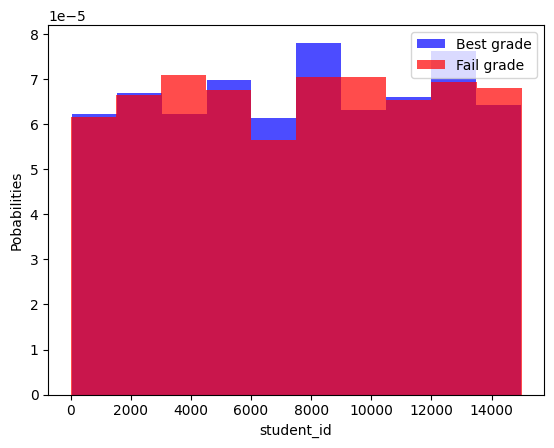

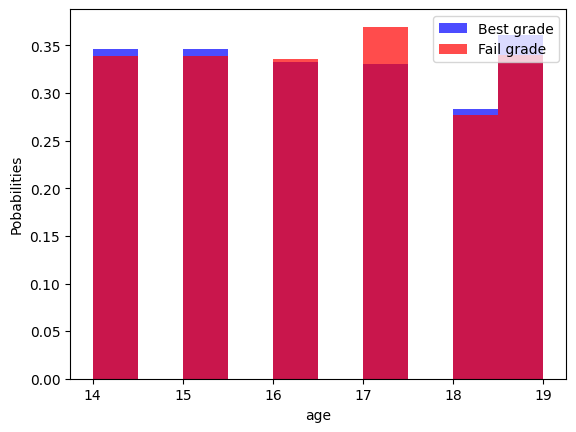

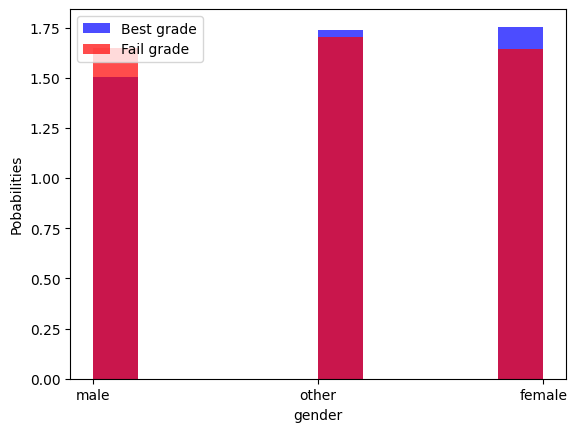

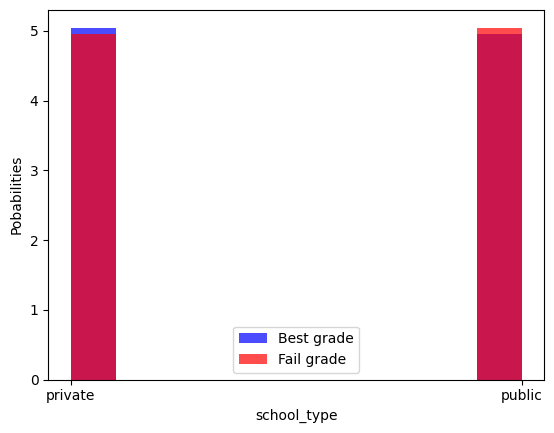

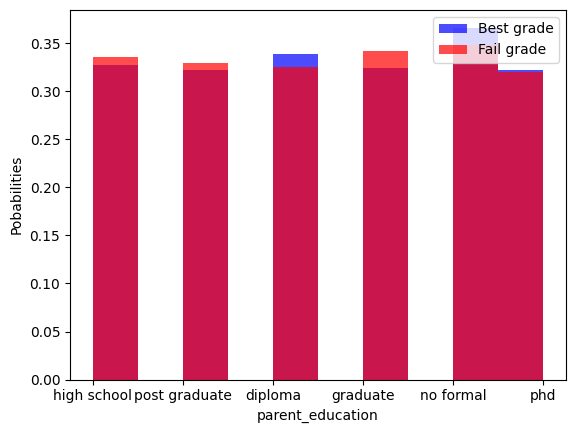

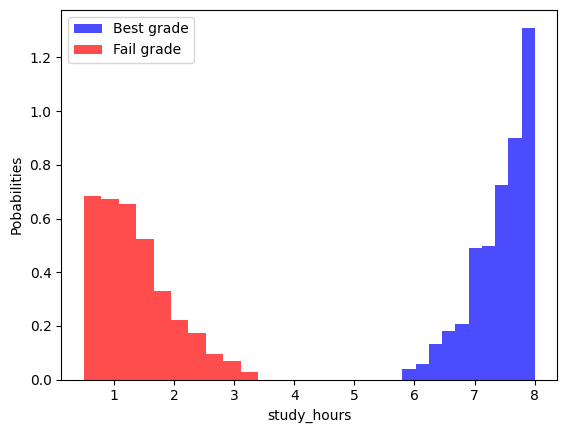

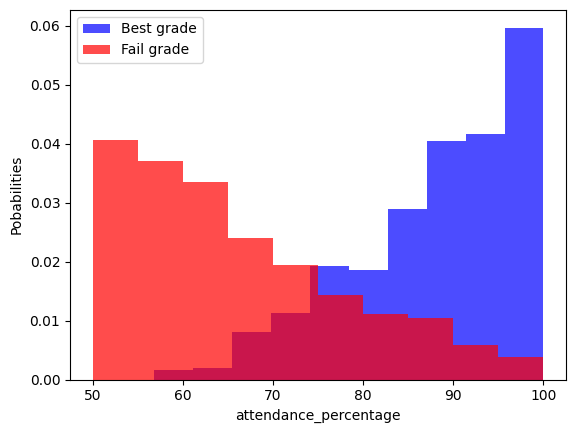

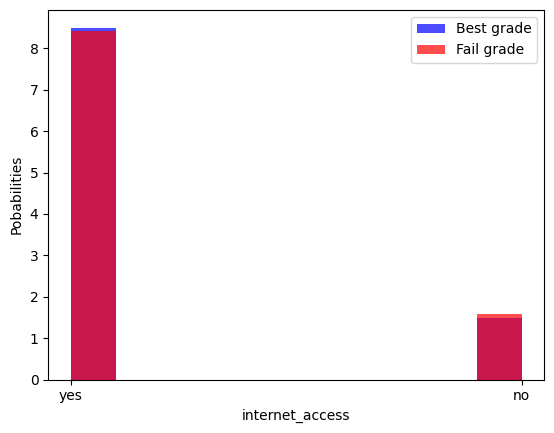

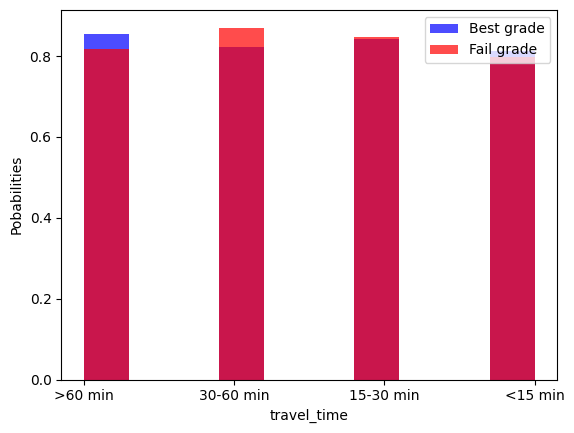

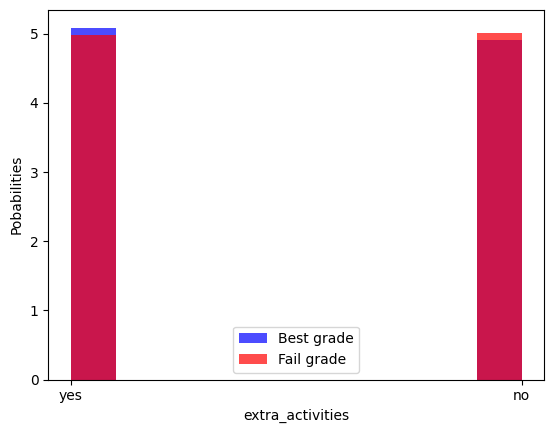

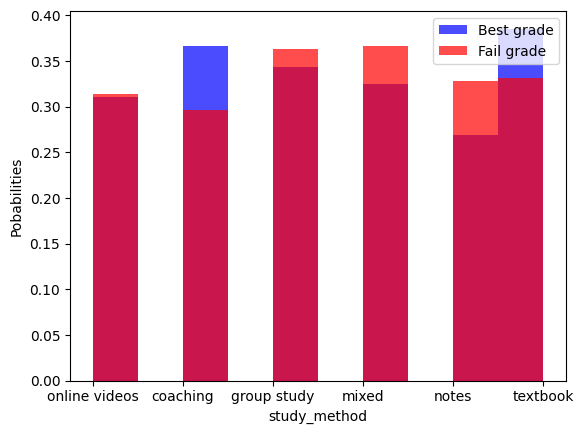

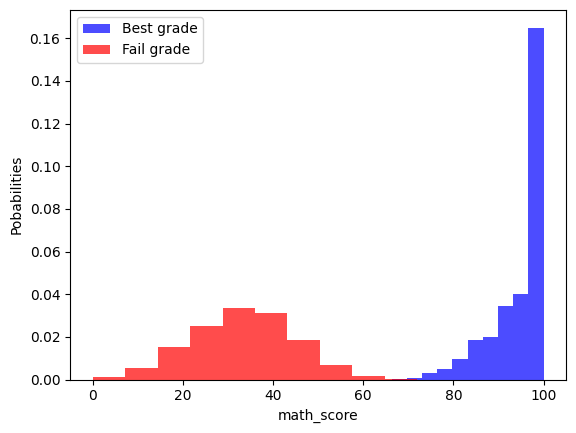

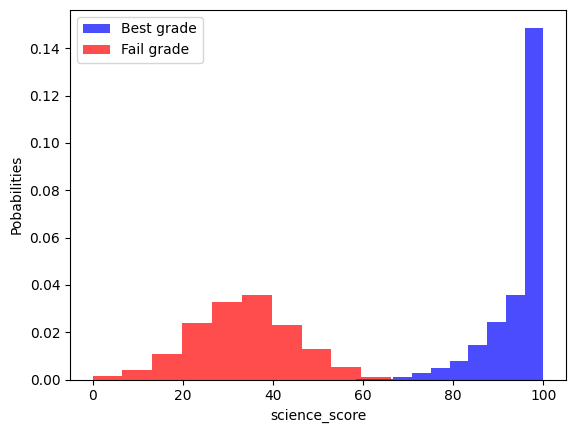

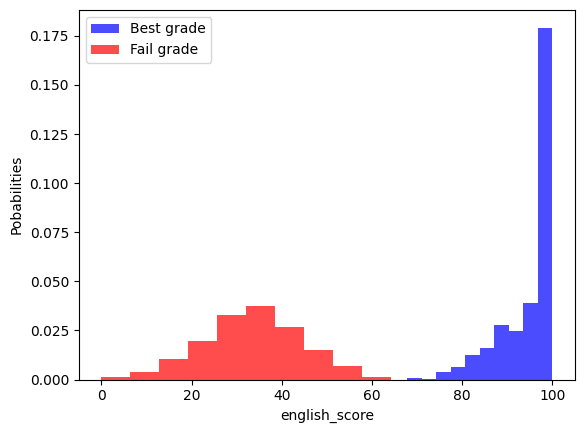

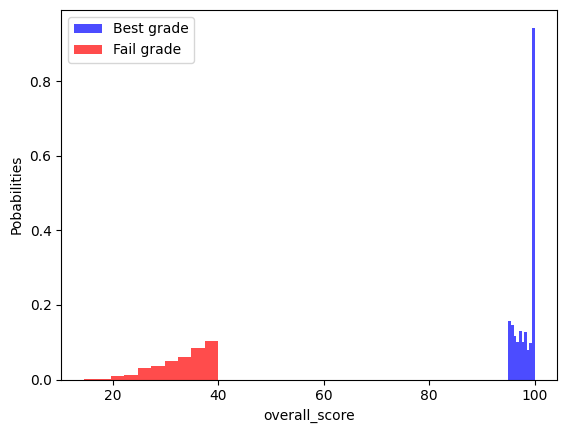

In [ ]:
for label in df.columns[:-1]:
  plt.hist(df[df['final_grade'] == 'a'][label], color='blue', label='Best grade', alpha=0.7, density=True)
  plt.hist(df[df['final_grade'] == 'f'][label], color='red', label='Fail grade', alpha=0.7, density=True)
  plt.ylabel("Pobabilities")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [ ]:
# Features that matter
# study_hours
# math score
# science score
# english score
# overall_score
# attendance percentage

In [ ]:
df = df[['study_hours', 'attendance_percentage', 'math_score', 'science_score', 'english_score', 'overall_score', 'final_grade']]

In [ ]:
df.head()

,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score,final_grade
0,3.1,84.3,42.7,55.4,57.0,53.1,e
1,3.7,87.8,57.6,68.8,64.8,61.3,d
2,7.9,65.5,84.8,95.0,79.2,89.6,b
3,1.1,58.1,44.4,27.5,54.7,41.6,e
4,1.3,61.0,8.9,32.7,30.0,25.4,f


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   study_hours            14999 non-null  float64
 1   attendance_percentage  14999 non-null  float64
 2   math_score             14999 non-null  float64
 3   science_score          14999 non-null  float64
 4   english_score          14999 non-null  float64
 5   overall_score          14999 non-null  float64
 6   final_grade            14999 non-null  object 
dtypes: float64(6), object(1)
memory usage: 937.4+ KB


### Grade mapping

In [ ]:
grade_mapping = {
    'a': 5,
    'b': 4,
    'c': 3,
    'd': 2,
    'e': 1,
    'f': 0
}

df['final_grade'] = df['final_grade'].map(grade_mapping)

In [ ]:
df.head()

,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score,final_grade
0,3.1,84.3,42.7,55.4,57.0,53.1,1
1,3.7,87.8,57.6,68.8,64.8,61.3,2
2,7.9,65.5,84.8,95.0,79.2,89.6,4
3,1.1,58.1,44.4,27.5,54.7,41.6,1
4,1.3,61.0,8.9,32.7,30.0,25.4,0


In [ ]:
X = df[['attendance_percentage', 'study_hours', 'math_score', 'science_score', 'english_score', 'overall_score']]
y = df['final_grade']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)

In [ ]:
X_train.shape

(11999, 6)

In [ ]:
reg = LogisticRegression(solver='saga', max_iter=1000)
model = reg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.63      0.85      0.73       261
           1       0.73      0.66      0.69       734
           2       0.66      0.66      0.66       751
           3       0.81      0.57      0.67      1070
           4       0.28      0.61      0.39       163
           5       0.03      0.19      0.05        21

    accuracy                           0.64      3000
   macro avg       0.52      0.59      0.53      3000
weighted avg       0.70      0.64      0.66      3000



In [ ]:
import seaborn as sns

### Visualizing results of Logistic Regression

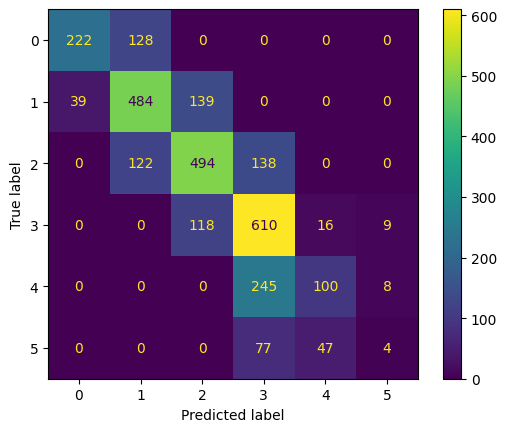

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=reg.classes_)
disp.plot()
plt.show()

## kNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(X_train, y_train)

In [ ]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       350
           1       0.89      0.89      0.89       662
           2       0.87      0.91      0.89       754
           3       0.89      0.91      0.90       753
           4       0.89      0.85      0.87       353
           5       0.96      0.85      0.90       128

    accuracy                           0.89      3000
   macro avg       0.90      0.88      0.89      3000
weighted avg       0.89      0.89      0.89      3000



### Visualizing results of KNN

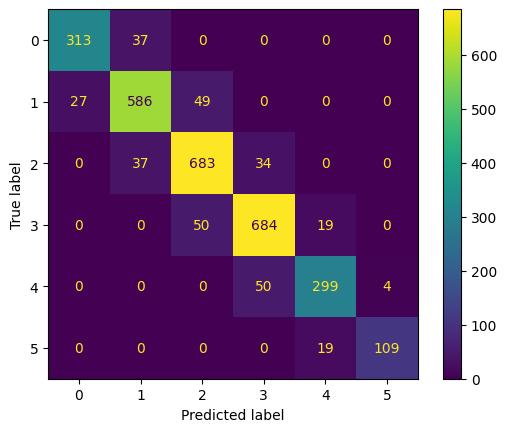

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot()
plt.show()

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       350
           1       0.96      0.96      0.96       662
           2       0.94      0.97      0.96       754
           3       0.96      0.97      0.96       753
           4       0.95      0.94      0.94       353
           5       1.00      0.88      0.94       128

    accuracy                           0.96      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg       0.96      0.96      0.96      3000



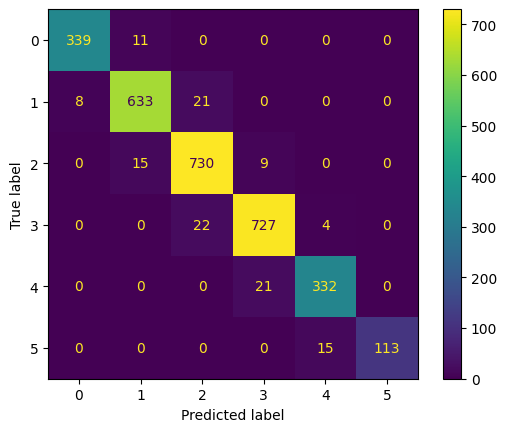

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot()
plt.show()